In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Financials.csv')
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,01/04/2014,4,April,2014


In [3]:
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [4]:
#removing whitespaces from column names
df.rename(columns = {' Product ':'Product', ' Discount Band ': 'Discount Band',' Units Sold ': 'Units Sold', ' Manufacturing Price ': 'Manufacturing Price',' Sale Price ':'Sale Price' , ' Gross Sales ': 'Gross Sales', ' Discounts ': 'Discounts',
       '  Sales ': 'Sales', ' COGS ':'COGS',' Profit ': 'Profit',' Month Name ':'Month Name'}, inplace = True)

In [5]:
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [6]:
# Remove '$', '-' and commas from columns containing numerical data
numeric_cols = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']
for col in numeric_cols:
    df[col] = df[col].replace({'\$': '', '-': '', ',': ''}, regex=True)

# Convert columns to appropriate numeric data types, handling missing values
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [7]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,NaN,32370.0,16185.0,16185.0,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,NaN,26420.0,13210.0,13210.0,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,NaN,32670.0,21780.0,10890.0,01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,NaN,13320.0,8880.0,4440.0,01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,NaN,37050.0,24700.0,12350.0,01/06/2014,6,June,2014


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df = df.dropna()

In [11]:
df.isna().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
Sales                  0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 53 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              584 non-null    object        
 1   Country              584 non-null    object        
 2   Product              584 non-null    object        
 3   Discount Band        584 non-null    object        
 4   Units Sold           584 non-null    float64       
 5   Manufacturing Price  584 non-null    float64       
 6   Sale Price           584 non-null    float64       
 7   Gross Sales          584 non-null    float64       
 8   Discounts            584 non-null    float64       
 9   Sales                584 non-null    float64       
 10  COGS                 584 non-null    float64       
 11  Profit               584 non-null    float64       
 12  Date                 584 non-null    datetime64[ns]
 13  Month Number         584 non-null 

In [13]:
df.describe()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Year
count,584.000000,584.000000,584.000000,5.840000e+02,584.000000,5.840000e+02,584.000000,584.000000,584.000000,584.000000
mean,1590.744007,96.369863,120.082192,1.817756e+05,13484.053116,1.682915e+05,141006.316781,27285.220103,8.005137,2013.739726
std,870.856267,108.714649,144.481637,2.670847e+05,24290.271204,2.477062e+05,212291.135059,42328.938483,3.341866,0.439160
min,200.000000,3.000000,7.000000,1.799000e+03,18.410000,1.655080e+03,918.000000,285.600000,1.000000,2013.000000
25%,884.500000,5.000000,12.000000,1.636600e+04,908.750000,1.496274e+04,7066.500000,3815.707500,6.000000,2013.000000
50%,1514.000000,10.000000,20.000000,3.250500e+04,2531.760000,3.003674e+04,19395.000000,10728.115000,9.000000,2014.000000
75%,2216.750000,250.000000,300.000000,2.668250e+05,13328.000000,2.435912e+05,223875.000000,25243.500000,11.000000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,12.000000,2014.000000


In [14]:
#Q1. What product had the highest average gross sales per unit sold?

df.groupby('Product')['Gross Sales'].mean()/df.groupby('Product')['Units Sold'].sum()

Product
 Amarilla      1.651998
 Carretera     1.333269
 Montana       1.462578
 Paseo         0.600144
 VTT           1.377881
 Velo          1.395343
dtype: float64

In [16]:
#Q2. Which differnet government secotrs had what statistical summary of profits and sales? 

df.groupby('Segment').agg({'Sales' : ['mean','median','std'],'Profit' : ['mean','median','std'] })

Sales                                 Profit  \
                           mean    median            std          mean   
Segment                                                                  
Channel Partners   17540.196000   17210.1    9080.243932  12781.346000   
Enterprise        180201.794516  190362.5  102036.435418   3283.084839   
Government        172741.188143   26945.6  266087.343933  36681.964929   
Midmarket          24038.311379   24576.3   12391.247153   6474.173448   
Small Business    423526.234375  373755.0  242043.475422  40086.130208   

                                          
                    median           std  
Segment                                   
Channel Partners  12672.60   6608.545414  
Enterprise         2511.25   1811.783557  
Government        11681.30  54780.102084  
Midmarket          6670.00   3478.601162  
Small Business    34021.50  30330.114831

In [50]:
#Q3. What product had the lowest profit margin percentage?

df.groupby('Product').apply(lambda x: (x['Profit']/x['Gross Sales']).mean()).idxmin()

' VTT '

In [23]:
#Q4. Which product line and country combination resulted in the most units sold?

df.groupby(['Product','Country'])['Units Sold'].sum()

Product      Country                 
 Amarilla    Canada                      25928.0
             France                      23533.5
             Germany                     20550.0
             Mexico                      26375.0
             United States of America    26194.5
 Carretera   Canada                      30769.5
             France                      25758.0
             Germany                     16483.0
             Mexico                      18237.0
             United States of America    22372.5
 Montana     Canada                      25960.0
             France                      27526.0
             Germany                     20949.0
             Mexico                      27188.0
             United States of America    22769.5
 Paseo       Canada                      68104.5
             France                      62539.0
             Germany                     47414.5
             Mexico                      53757.0
             United States of A

In [38]:
#Q5. What month had the highest profit margin percentage overall across products?

df['Profit Margin %'] = df['Profit']/df['Gross Sales']
df.groupby('Month Number')['Profit Margin %'].mean()

Month Number
1     0.290688
2     0.314890
3     0.273136
4     0.258810
5     0.292396
6     0.240635
7     0.268227
8     0.293282
9     0.319377
10    0.282268
11    0.283524
12    0.289310
Name: Profit Margin %, dtype: float64

In [41]:
#Q6. Which region had the largest difference between average manufacturing price and sale price for the Velo product? 

df_velo = df[df['Product']==' Velo ']
df_velo.groupby('Segment').apply(lambda x: (x['Sale Price']-x['Manufacturing Price']).mean())

Segment
Channel Partners   -108.000000
Enterprise            5.000000
Government           -6.340909
Midmarket          -105.000000
Small Business      180.000000
dtype: float64

In [43]:
#Q7. What was the most common number of units sold per order for the Amarilla product?

df_amarilla = df[df['Product']==' Amarilla '] 
df_amarilla['Units Sold'].mode()[0]

2475.0

In [44]:
#Q8. What was the highest single profit earned from one order of the Montana product?

df_mt = df[df['Product']==' Montana ']
df_mt['Profit'].max()

142861.5

In [45]:
#Q9. Which product had the smallest variance in sale prices per unit over time?

df.groupby('Product')['Sale Price'].var()

Product
 Amarilla      23895.026667
 Carretera     20666.108108
 Montana       21455.264867
 Paseo         19062.122866
 VTT           22287.544727
 Velo          20215.125128
Name: Sale Price, dtype: float64

In [47]:
#Q10. What segment had the highest total profit margin for the Paseo product in Germany?

df_paseo_ger = df[(df['Product']==' Paseo ') & (df['Country']=='Germany')]
df_paseo_ger.groupby('Segment')['Profit'].sum()

Segment
Channel Partners     28396.80
Enterprise            6117.50
Government          256830.49
Midmarket            32649.45
Small Business      218502.00
Name: Profit, dtype: float64

In [51]:
#Q11. What product had the lowest profit margin percentage?

df.groupby('Product').apply(lambda x: (x['Profit']/x['Gross Sales']).mean())

Product
 Amarilla      0.295990
 Carretera     0.327962
 Montana       0.264496
 Paseo         0.277616
 VTT           0.264235
 Velo          0.284687
dtype: float64

In [52]:
#Q12. Which country had the highest total profit for the Paseo product line?

df_paseo = df[df['Product']==' Paseo ']
df_paseo.groupby('Country')['Profit'].sum().idxmax()

'Canada'

In [57]:
#Q13. What country had the lowest total discounts applied for the VTT product?

df_vtt = df[df['Product']==' VTT ']
df_vtt.groupby('Country')['Discounts'].sum()

Country
Canada                      245034.94
France                      191569.91
Germany                     195457.23
Mexico                      122431.04
United States of America    521494.36
Name: Discounts, dtype: float64

In [59]:
#Q14. What year had the highest average number of units sold per order for the Montana product?

df_mt = df[df['Product']==' Montana ']
df_mt.groupby('Year')['Units Sold'].mean()

Year
2013    1567.052632
2014    1631.353448
Name: Units Sold, dtype: float64

Text(0, 0.5, 'Profit')

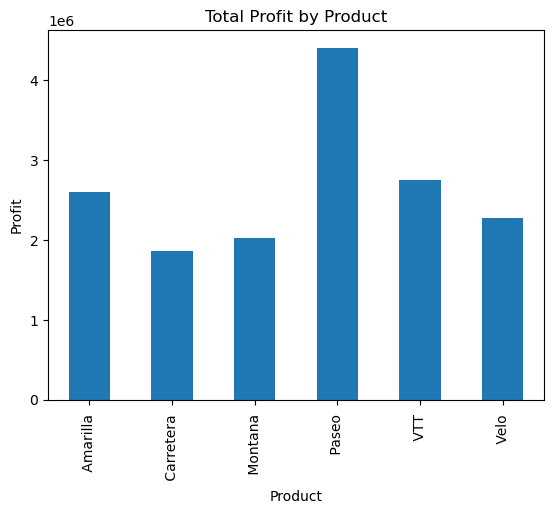

In [60]:
#Total profit by product bar chart

df.groupby('Product')['Profit'].sum().plot(kind='bar')
plt.title("Total Profit by Product")
plt.ylabel('Profit')

<Axes: ylabel='Discount %'>

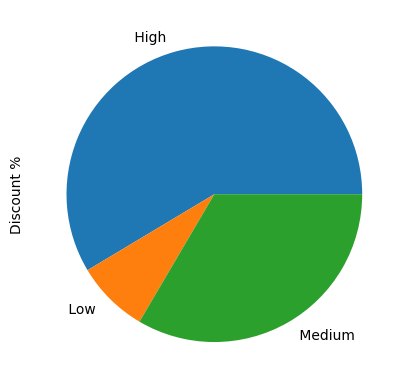

In [61]:
#Discount percentage pie chart

df['Discount %'] = 1 - df['Sales']/df['Gross Sales']
df.groupby('Discount Band')['Discount %'].sum().plot(kind='pie')

<Axes: xlabel='Manufacturing Price', ylabel='Units Sold'>

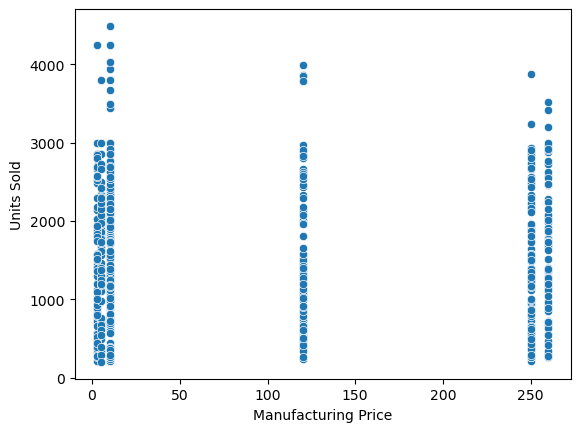

In [62]:
#Units sold scatterplot by manufacturing price

sns.scatterplot(data=df, x='Manufacturing Price', y='Units Sold')

<Axes: ylabel='Density'>

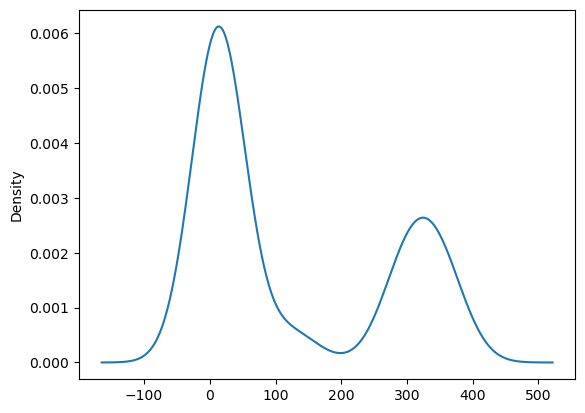

In [63]:
#Sales price density plot

df['Sale Price'].plot(kind='density')

<Axes: xlabel='Date'>

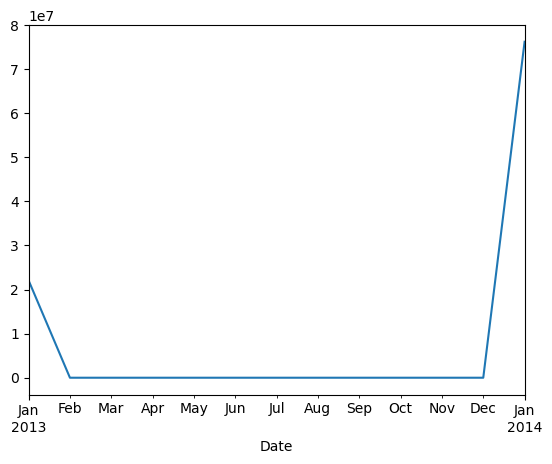

In [65]:
#Date-based sales trend line plot

df.set_index('Date')['Sales'].resample('M').sum().plot()

<Axes: xlabel='Segment', ylabel='Profit'>

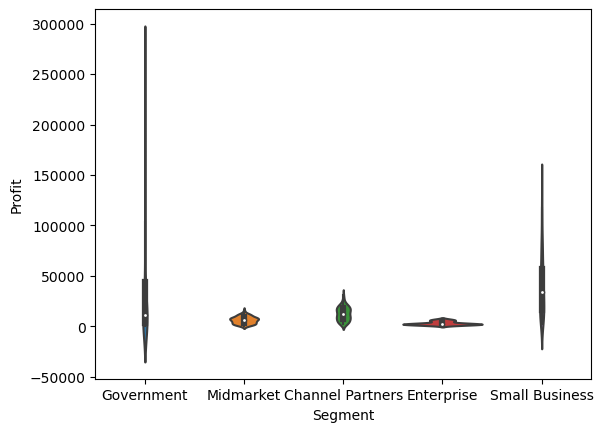

In [66]:
#Violin plot of profit distribution per product segment

sns.violinplot(data=df, x='Segment', y='Profit')

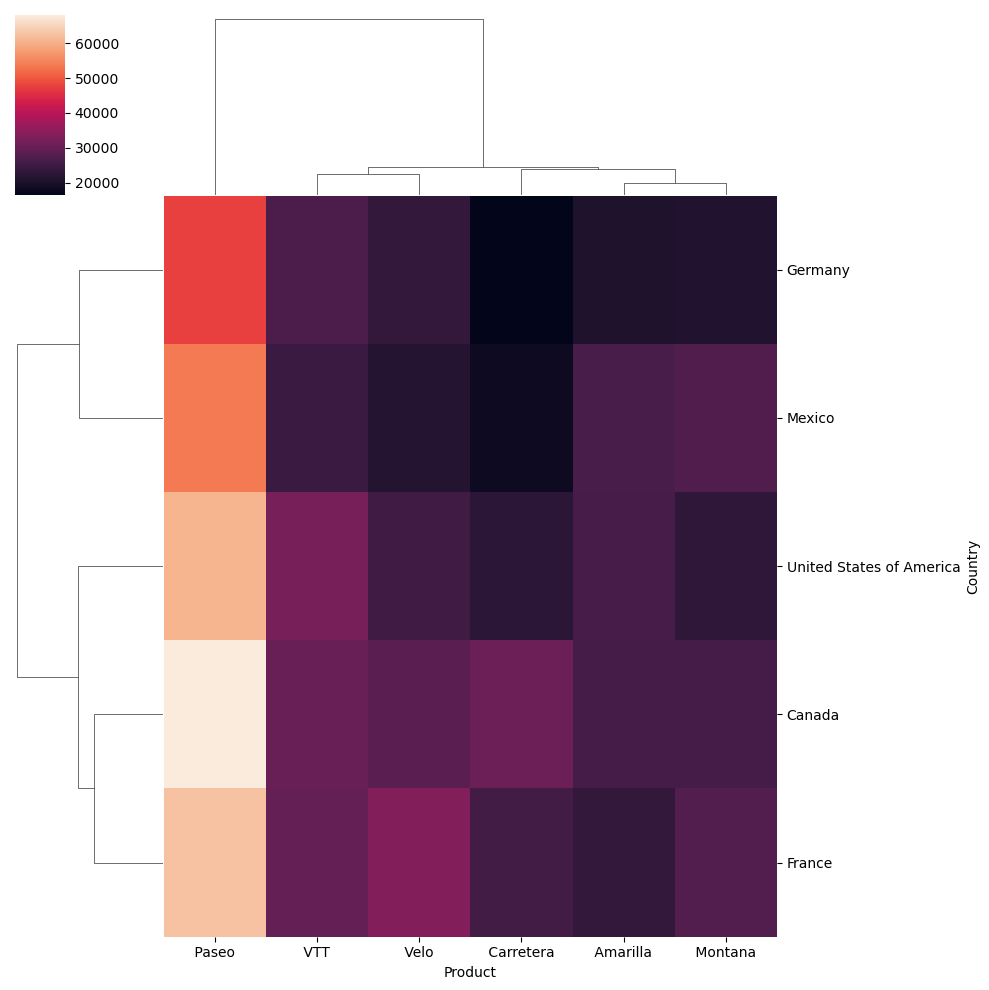

In [67]:
#Cluster map of sales quantity by product and country

sns.clustermap(df.pivot_table(index='Country',
                           columns='Product',
                           values='Units Sold',
                           aggfunc='sum'))

<Axes: xlabel='Date'>

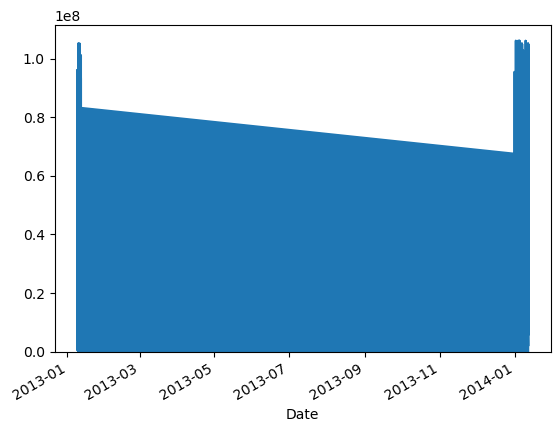

In [68]:
#Area plot of cumulative gross sales over time

df.set_index('Date')['Gross Sales'].cumsum().plot(kind='area')

<Axes: xlabel='Product', ylabel='Segment'>

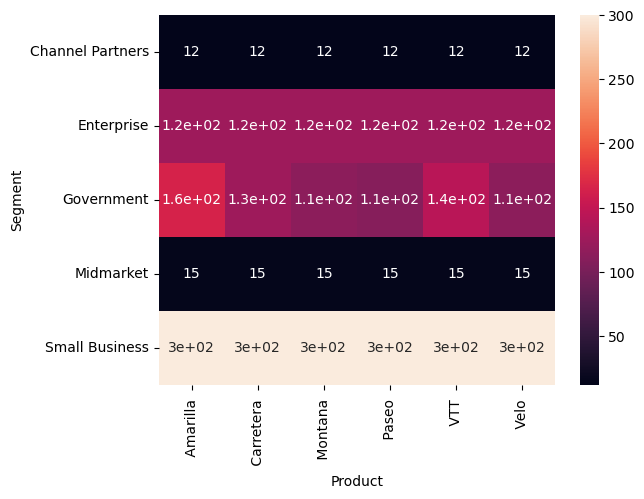

In [69]:
#Sales price heatmap by segment and product

sns.heatmap(df.pivot_table(values='Sale Price', index='Segment', columns='Product', aggfunc='mean'), annot=True)

<Axes: ylabel='Discount %'>

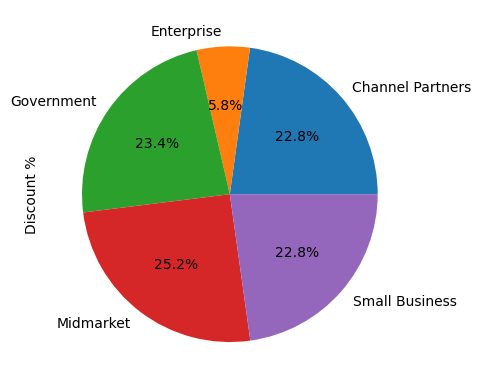

In [72]:
#Pie chart of average discount percentage per region

avg_discount = df.groupby('Segment')['Discount %'].mean() 
avg_discount.plot.pie(autopct='%1.1f%%')

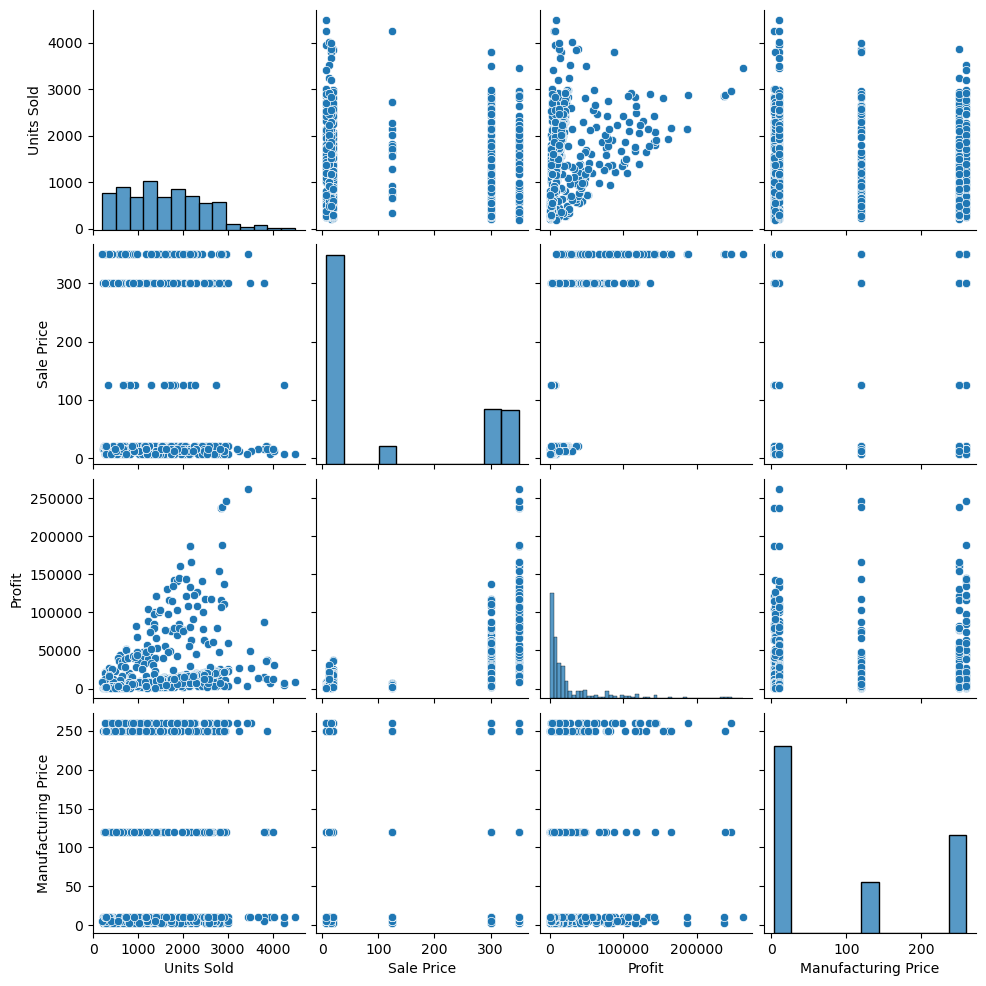

In [73]:
#Pairplot showing relationships between numerical columns

sns.pairplot(df, vars=['Units Sold', 'Sale Price', 'Profit', 'Manufacturing Price'])